In [1]:
# 모듈 정리
import matplotlib.font_manager as fm  # 폰트
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image

from fbprophet import Prophet 

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Importing plotly failed. Interactive plots will not work.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [ ]:
#그래프 보기

In [79]:
data1=pd.read_csv('백화점,시장,마트_전처리.csv',encoding='euc-kr')
data1.set_index(['지역'],inplace=True)

In [80]:
# data1.head()

In [91]:
df = data1.loc['남구']

df['연월'] = pd.to_datetime(df['연월'])
df['귤10개'] = pd.to_numeric(df['귤10개'])

df.fillna(method='ffill',inplace=True) 
df.fillna(method='bfill',inplace=True) 
df.fillna(1,inplace=True)

df = df[['연월', '귤10개']].reset_index(drop=True)

df = df.rename(columns={'연월': 'ds', '귤10개': 'y'})


# df.head()

<ipython-input-91-d21d1d8fa520>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['연월'] = pd.to_datetime(df['연월'])
<ipython-input-91-d21d1d8fa520>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['귤10개'] = pd.to_numeric(df['귤10개'])
C:\Users\leeseungjin\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

<AxesSubplot:xlabel='ds'>

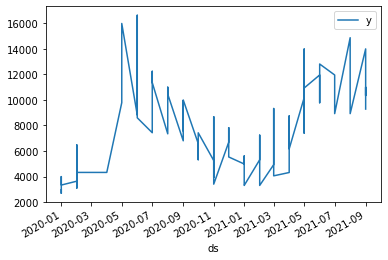

In [92]:
df.plot(x='ds', y='y')

In [93]:
model = Prophet(
    # seasonality
    yearly_seasonality=2.5,
)

# model.add_seasonality(name='monthly', period=30.5, fourier_order=2)
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [94]:
future = model.make_future_dataframe(periods=36, freq='M')

forecast = model.predict(future)

# forecast.tail()

In [95]:
# forecast.loc[13, :] #자료 마지막 월 예측

In [96]:
# forecast.loc[20, :] #자료 다음월 예측

In [97]:
# forecast.loc[21, :] #자료 다다음월 예측

In [98]:
forecast.loc[32, 'yhat'] # 1년후 예측

9228.480423676672

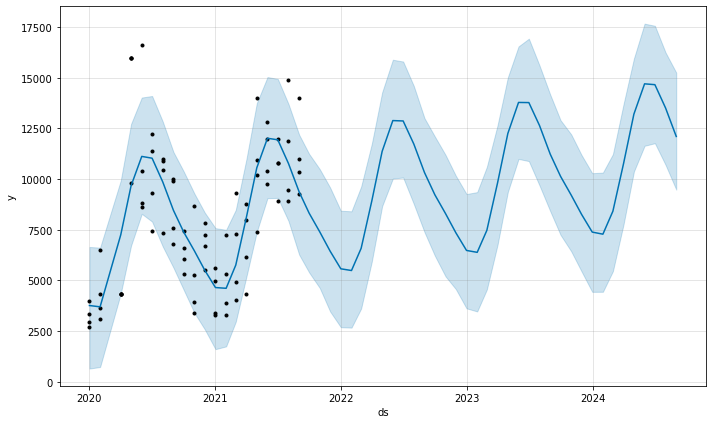

In [99]:
fig1 = model.plot(forecast, figsize=(10, 6))

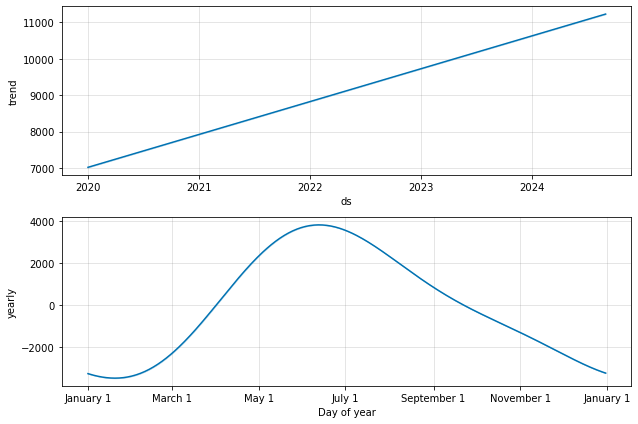

In [100]:
fig2 = model.plot_components(forecast)

In [27]:
# 표만들기

In [123]:
data2=pd.read_csv('백화점,시장,마트_전처리.csv',encoding='euc-kr')
data2.set_index(['지역', '매장'],inplace=True)

In [124]:
col=[]
for i in data2.columns:
  col.append(i)

In [125]:
li = []

df = data2.loc['동구', '롯데백화점']
df['연월'] = pd.to_datetime(df['연월'])
df.fillna(method='ffill',inplace=True) 
df.fillna(method='bfill',inplace=True) 
df.fillna(1,inplace=True)

for pum in col[1:]:

    df_f = df.rename(columns={'연월': 'ds', pum: 'y'})
    model = Prophet(    
        # seasonality
        yearly_seasonality=2.5,
    )
    model.fit(df_f)

    future = model.make_future_dataframe(periods=36, freq='M')
    forecast = model.predict(future)

    nextM = forecast.loc[20, 'yhat'] #다음달 예측값

    nowM = df[pum].iloc[-1]
    backM = df[pum].iloc[-2:-1]
    backM = backM[0]
    basic = df[pum].tail(1)
    basic = basic.to_frame()

    basic['전월대비'] = np.round((nowM-backM)/backM * 100, 2)
    basic['1개월전'] = backM
    basic['현월대비예상'] = np.round((nextM-nowM)/nowM * 100, 2)
    basic['다음달예상'] = np.round(nextM, 2)
    li.append(basic)

<ipython-input-125-7b9d5046f01e>:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df = data2.loc['동구', '롯데백화점']
<ipython-input-125-7b9d5046f01e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['연월'] = pd.to_datetime(df['연월'])
C:\Users\leeseungjin\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with d

KeyboardInterrupt: 

In [122]:
li[0]

,쌀20kg,전월대비,1개월전,현월대비예상,다음달예상
매장,,,,,
대인시장,65000.0,-1.52,66000.0,19.74,77828.75


In [ ]:
# 그래프 뽑기


In [724]:
data9=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hackathon_1012/백화점,시장,마트_전처리.csv',encoding='euc-kr')
data9.set_index(['지역', '매장'],inplace=True)

In [725]:
data9.head()

,,연월,쌀20kg,보리쌀1kg,콩1kg,밀가루2.5kg,두부(국산)340g,두부(수입)340g,참깨(국산)500g,참깨(수입)500g,소등심(국산)500g,소등심(수입)500g,돼지삼겹500g,닭육계1kg,달걀10개,갈치60cm,동태40cm,조기23cm,고등어30cm,오징어25cm,마른멸치5cm/1kg,생선통조림150g,사과10개,배1개,귤10개,배추2kg,상추100g,무1kg,콩나물270g,파1단,양파1kg,마늘1kg,감자1kg,설탕1kg,참기름320ml,식용류1.8L,고춧가루100g,간장1.8L,커피50개,콜라1.5L,우유1L,소주360ml,맥주355ml,라면120g,김16봉,휘발유1L,경유1L,LPG차량용1L,등유1L,연탄10장,세탁비누4kg,치약130g,샴푸780ml,화장지30롤
지역,매장,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
동구,롯데백화점,2020-01-01,55000.0,3750,25428.0,4983,3980.0,3048.0,35869.0,NaN,87250.0,47000.0,12333,6987.0,1833,26000.0,NaN,10000.0,6250.0,4800,22867,2517,17555,3766,3239.0,NaN,1647,1867,1620.0,9434,2587,20822,3497,2050,7000.0,9907.0,6950,9683.0,8350,4208,2833,1320,1800,780,10000.0,1527,1352,16160,1100,8000,6200.0,1387,5850.0,21214.0
서구,신세계백화점,2020-01-01,86000.0,5500,18750.0,3575,3850.0,1473.0,38000.0,NaN,66000.0,38000.0,16400,7181.0,3733,22867.0,NaN,NaN,7533.0,5917,40000,2700,22889,4917,2800.0,6800.0,2580,3087,2000.0,3900,3500,19000,4000,1950,5269.0,NaN,5727,9350.0,8350,4020,3000,1350,1850,676,8000.0,1585,1385,16200,1040,8000,NaN,3166,6767.0,27964.0
동구,영암마트 학동점,2020-01-01,64000.0,5000,13600.0,3650,4533.0,1524.0,15529.0,4533.0,56000.0,12000.0,8550,5238.0,1931,NaN,3500.0,NaN,2400.0,4900,19142,2750,18000,3733,2240.0,3999.0,1067,2611,1594.0,4333,1783,6267,3167,2150,4800.0,4000.0,5000,6533.0,8943,3400,3000,1300,1500,780,5040.0,1642,1442,14860,1150,8000,5900.0,1857,6882.0,26055.0
서구,롯데마트 월드컵점,2020-01-01,54000.0,2990,12960.0,3500,3489.0,1473.0,24875.0,5600.0,50800.0,12500.0,8050,6345.0,1993,7267.0,NaN,3300.0,3033.0,3900,9980,2560,12189,2993,3232.0,3480.0,1875,2433,1750.0,2613,1786,13800,5533,1580,7980.0,5637.0,4380,6500.0,7450,2500,2755,1190,1370,676,4878.0,1560,1372,19600,1100,8000,6600.0,3300,6825.0,18900.0
남구,진월동 마켓올레,2020-01-01,48033.0,5200,14600.0,3800,3850.0,1465.0,27500.0,14000.0,49167.0,NaN,8233,3900.0,1368,14600.0,2683.0,3300.0,2950.0,4283,22972,2500,19330,3400,2960.0,5960.0,1538,2546,1905.0,2410,2480,6467,2667,2100,6500.0,3750.0,4160,7810.0,8300,3400,2537,1250,1550,700,7200.0,1582,1399,14260,1133,8000,10400.0,2057,5530.0,23125.0


In [ ]:
df = data1.loc['동구', '롯데백화점']
# df = data1
# df = data1.loc['롯데백화점']
# df = data1.loc['동구']

df['연월'] = pd.to_datetime(df['연월'])
df['귤10개'] = pd.to_numeric(df['귤10개'])
# df['귤'] = df['귤'].apply(pd.to_numeric, errors = 'coerce')


df = df[['연월', '귤10개']].reset_index(drop=True)

df = df.rename(columns={'연월': 'ds', '귤10개': 'y'})

df.fillna(method='ffill',inplace=True) 

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: PerformanceWarning:

indexing past lexsort depth may impact performance.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
0,2020-01-01,3239.0
1,2020-02-01,6467.0
2,2020-04-01,11425.0
3,2020-05-01,14239.0
4,2020-06-01,14422.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      20 non-null     datetime64[ns]
 1   y       20 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 448.0 bytes


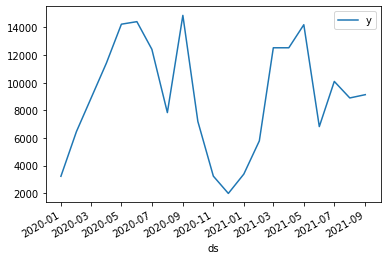

In [ ]:
df.plot(x='ds', y='y')

In [ ]:
model = Prophet(
    # seasonality
    yearly_seasonality=2.5,
)

# model.add_seasonality(name='monthly', period=30.5, fourier_order=2)
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


In [ ]:
future = model.make_future_dataframe(periods=36, freq='M')

forecast = model.predict(future)

forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
51,2024-04-30,3886.272698,5695.431664,10690.990197,3886.271456,3886.273842,4417.344092,4417.344092,4417.344092,4417.344092,4417.344092,4417.344092,0.0,0.0,0.0,8303.616790
52,2024-05-31,3771.457267,4100.922954,9096.138905,3771.455957,3771.458463,2756.326108,2756.326108,2756.326108,2756.326108,2756.326108,2756.326108,0.0,0.0,0.0,6527.783374
53,2024-06-30,3660.345559,3179.529137,7817.636398,3660.344186,3660.346804,1890.180009,1890.180009,1890.180009,1890.180009,1890.180009,1890.180009,0.0,0.0,0.0,5550.525567
54,2024-07-31,3545.530127,3163.770387,8111.116581,3545.528686,3545.531429,2132.283163,2132.283163,2132.283163,2132.283163,2132.283163,2132.283163,0.0,0.0,0.0,5677.813290
55,2024-08-31,3430.714695,2847.370977,7750.565931,3430.713172,3430.716066,1890.235069,1890.235069,1890.235069,1890.235069,1890.235069,1890.235069,0.0,0.0,0.0,5320.949764


In [ ]:
forecast.loc[13, :] #자료 마지막 월 예측

ds                            2021-03-01 00:00:00
trend                                     8167.78
yhat_lower                                7837.67
yhat_upper                                12731.3
trend_lower                               8167.78
trend_upper                               8167.78
additive_terms                            2205.66
additive_terms_lower                      2205.66
additive_terms_upper                      2205.66
yearly                                    2205.66
yearly_lower                              2205.66
yearly_upper                              2205.66
multiplicative_terms                            0
multiplicative_terms_lower                      0
multiplicative_terms_upper                      0
yhat                                      10373.4
Name: 13, dtype: object

In [ ]:
forecast.loc[20, :] #자료 다음월 예측

ds                            2021-09-30 00:00:00
trend                                     7378.88
yhat_lower                                4532.71
yhat_upper                                9528.87
trend_lower                               7378.88
trend_upper                               7378.88
additive_terms                            -318.62
additive_terms_lower                      -318.62
additive_terms_upper                      -318.62
yearly                                    -318.62
yearly_lower                              -318.62
yearly_upper                              -318.62
multiplicative_terms                            0
multiplicative_terms_lower                      0
multiplicative_terms_upper                      0
yhat                                      7060.26
Name: 20, dtype: object

In [ ]:
forecast.loc[21, :] #자료 다다음월 예측

ds                            2021-10-31 00:00:00
trend                                     7264.07
yhat_lower                                769.661
yhat_upper                                5483.28
trend_lower                               7264.07
trend_upper                               7264.07
additive_terms                           -4154.71
additive_terms_lower                     -4154.71
additive_terms_upper                     -4154.71
yearly                                   -4154.71
yearly_lower                             -4154.71
yearly_upper                             -4154.71
multiplicative_terms                            0
multiplicative_terms_lower                      0
multiplicative_terms_upper                      0
yhat                                      3109.36
Name: 21, dtype: object

In [ ]:
forecast.loc[32, 'yhat'] # 1년후 예측

5735.418399418829

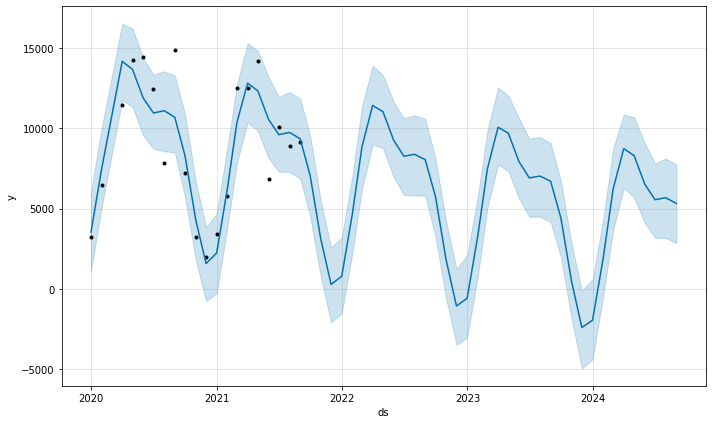

In [ ]:
fig1 = model.plot(forecast, figsize=(10, 6))

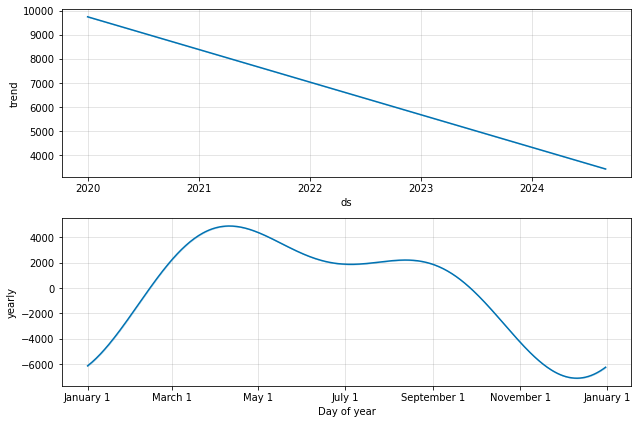

In [ ]:
fig2 = model.plot_components(forecast)